# FLIM-Phasors simulator v1.0

With the FLIM-Phasors simulator it is possible to create FLIM images and display the associated phasor plot.

Needed libraries

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from matplotlib import colors
from scipy import ndimage, misc

Populating the interactive namespace from numpy and matplotlib


## Specify parameters

Select the desired fluorescence lifetimes

In [2]:
tau1 = 0.5 # in nanoseconds
tau2 = 2   # in nanoseconds
tau3 = 3   # in nanoseconds
tau4 = 4   # in nanoseconds

Select the laser period

In [3]:
laser_period_in_nanoseconds = 12.5 # in nanoseconds

Specify the number of photons per pixel

In [4]:
photons = 100 

Select the number of time-bins in the TCSPC histogram

In [5]:
bin_number = 256

Select image size

In [6]:
x_dim = 256 # pixels - square image dimension 
y_dim = x_dim # pixels - square image dimension

Select harmonic number for the phasor plot

In [7]:
harmonic = 1

# Half_image

The **half_image** function below will produce an image made up my two subimages having equal intensities but different lifetimes

**Inputs**
    
1. tau1 - lifetime in nanoseconds
2. tau2 - lifetime in nanoseconds
3. photons - number of photons per pixel
4. laser_period_in_nanoseconds - laser period in nanoseconds
5. harmonic - harmonic number for the phasor plot analysis and representation
6. bin_number - number of time-bins in the TCSPC histogram
7. x_dim - x dimension in pixel of the final image
8. y_dim - y dimension in pixel of the final image
    
    
**Outputs**
    
1. image(x,y,photons) - x pixel, y pixel wide inensity image
2. G(x,y,g) - x pixel, y pixel wide g coordinates for the nth-harmonic phasor plot
3. S(x,y,s) - x pixel, y pixel wide s coordinates for the nth-harmonic phasor plot

In [8]:
def half_image(tau1, tau2, photons, laser_period_in_nanoseconds, harmonic, bin_number, x_dim, y_dim):
    
    # Inputs
    
    # tau1 - lifetime in nanoseconds
    # tau2 - lifetime in nanoseconds
    # photons - number of photons per pixel
    # laser_period_in_nanoseconds - laser period in nanoseconds
    # harmonic - harmonic number for the phasor plot analysis and representation
    # bin_number - number of time-bins in the TCSPC histogram
    # x_dim - x dimension in pixel of the final image
    # y_dim - y dimension in pixel of the final image
    
    
    # Outputs
    
    # image(x,y,photons) - x pixel, y pixel wide inensity image
    # G(x,y,g) - x pixel, y pixel wide g coordinates for the nth-harmonic phasor plot
    # S(x,y,s) - x pixel, y pixel wide s coordinates for the nth-harmonic phasor plot
    
    
    
    # Allocating 2D datasets for the intensity image(x,y,photons), G(x,y,g) and  S(x,y,s)
    image = np.zeros((x_dim,y_dim)) # empty intensity image
    G = np.zeros((x_dim,y_dim))     # empty G matrix for phasors
    S = np.zeros((x_dim,y_dim))     # empty S matrix for phasors

    for i in range(0,int(x_dim/2)):
        for j in range(0,y_dim):

            Y1 = np.random.exponential(tau1, int(photons)) # random exponential distribution having tau as a decay constant
            Y1 = (Y1)%laser_period_in_nanoseconds # using the MOD mathematical operation to constrain photons arrivals within the laser period
            dist1 = np.histogram(Y1, bins=bin_number) # TCSPC histogram calculation
            x1 = dist1[1][0:-1] # x axis values for TCSPC histogram
            y1 = dist1[0]       # y axis values for TCSPC histogram
            sine1 = np.sin(2*pi*harmonic*x1/laser_period_in_nanoseconds) # creating sine wave for phasor approach
            cosine1 = np.cos(2*pi*harmonic*x1/laser_period_in_nanoseconds) # creating cosine wave for phasor approach
            G[i][j] = (cosine1*y1).sum()/y1.sum() # computing G matrix
            S[i][j] = (sine1*y1).sum()/y1.sum()   # computing S matrix
            image[i][j] = y1.sum()                # computing intensity image

    for i in range(int(x_dim/2),x_dim):
        for j in range(0,y_dim):

            Y1 = np.random.exponential(tau2, int(photons)) # random exponential distribution having tau as a decay constant
            Y1 = (Y1)%laser_period_in_nanoseconds # using the MOD mathematical operation to constrain photons arrivals within the laser period
            dist1 = np.histogram(Y1, bins=bin_number) # TCSPC histogram calculation
            x1 = dist1[1][0:-1] # x axis values for TCSPC histogram
            y1 = dist1[0]       # y axis values for TCSPC histogram
            sine1 = np.sin(2*pi*harmonic*x1/laser_period_in_nanoseconds) # creating sine wave for phasor approach
            cosine1 = np.cos(2*pi*harmonic*x1/laser_period_in_nanoseconds) # creating cosine wave for phasor approach
            G[i][j] = (cosine1*y1).sum()/y1.sum() # computing G matrix
            S[i][j] = (sine1*y1).sum()/y1.sum()   # computing S matrix
            image[i][j] = y1.sum()                # computing intensity image
        
    return G,S,image

Calling **half_image**

In [9]:
G,S,image=half_image(tau1, tau2, photons, laser_period_in_nanoseconds, harmonic, bin_number, x_dim, y_dim)

# Phasor_plotting

The **phasor_plotting** function outputs 5 different figures:
1. the phasor plot
2. the final intensity image
3. the FLIM image calulated using the lifetime values calculated with the phase
4. the FLIM image calulated using the lifetime values calculated with the modulation
5. a 2D histogram of the modulation lifetimes vs. the phase lifetimes

In [10]:
def phasor_plotting(G,S,image,max_lifetime,hist_bins=0):
    
    # Inputs
    
    # image(x,y,photons) - x pixel, y pixel wide inensity image
    # G(x,y,g) - x pixel, y pixel wide g coordinates for the nth-harmonic phasor plot
    # S(x,y,s) - x pixel, y pixel wide s coordinates for the nth-harmonic phasor plot
    # max_lifetime - full-scale maximum lifetime in nanoseconds
    # hist_bins - number of histogram bins for the 2D histogram of the modulation lifetimes vs. the phase lifetimes
    
    if (hist_bins==0): # if no hist_bins is specified it is automatically set to 100
        hist_bins=100

    
    
    # Outputs
    
    # tau_m(x,y,lifetime_modulation) - x pixel, y pixel wide lifetime values calculated with the modulation using the nth-harmonic
    # tau_m(x,y,lifetime_phase) - x pixel, y pixel wide lifetime values calculated with the phase using the nth-harmonic

    
    fig = plt.figure(figsize=(20,18))

    # Phasor plot
    plt.subplot(3,2,1)
    k= np.asarray(G).reshape(-1)
    v= np.asarray(S).reshape(-1)

    plt.hist2d(k, v,bins = 100, cmap = 'jet', norm = colors.LogNorm()) 

    title = "1. - Harmonic = "+str(harmonic)+" Phasor Plot"
    plt.title(title)
    plt.xlabel('$g$')
    plt.ylabel('$s$')

    cbar = plt.colorbar()
    cbar.ax.set_ylabel('\n Pixels')


    plt.xlim([-0.005,1.2])
    plt.ylim([0,0.8])
    x = np.linspace(-1.0, 1.0, 100)
    y = np.linspace(-1.0, 1.0, 100)
    X, Y = np.meshgrid(x,y)
    F = (X**2 + Y**2 - X)
    plt.contour(X,Y,F,[0],colors='b',linewidths=3)

    
    # Intensity image
    plt.subplot(3,2,2)
    plt.imshow(image,cmap='magma')
    title = "2. - Intensity image"
    plt.title(title)
    plt.xlabel('$x (pixels) $')
    plt.ylabel('$y (pixels) $')
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('\n Photons')

    # Phase lifetime
    tau_p = (laser_period_in_nanoseconds/(2*pi*harmonic))*(S/G) # calculation of lifetime using the phase
    plt.subplot(3,2,3)
    
    # FLIM from phase lifetime
    plt.imshow(tau_p, vmin = 0, vmax = max_lifetime, cmap='jet')
    title = "3. - FLIM from phase lifetime and harmonic = "+str(harmonic)
    plt.title(title)
    plt.xlabel('$x (pixels) $')
    plt.ylabel('$y (pixels) $')

    cbar = plt.colorbar()
    cbar.ax.set_ylabel('\n Phase Lifetime (ns)')

    # Modulation lifetime
    tau_m = (laser_period_in_nanoseconds/(2*pi*harmonic))*np.sqrt((1/(S*S+G*G))-1) # calculation of lifetime using the modulation
    plt.subplot(3,2,4)
    
    # FLIM from modulation lifetime
    plt.imshow(tau_m, vmin = 0, vmax = max_lifetime, cmap='jet')
    title = "4. - FLIM from modulation lifetime and harmonic = "+str(harmonic)
    plt.title(title)
    plt.xlabel('$x (pixels) $')
    plt.ylabel('$y (pixels) $')

    cbar = plt.colorbar()
    cbar.ax.set_ylabel('\n Modulation Lifetime (ns)')




    plt.subplot(3,2,5)
    
    modulations= np.asarray(tau_m).reshape(-1)
    phases= np.asarray(tau_p).reshape(-1)

    plt.hist2d(phases,modulations,bins = hist_bins, cmap = 'jet', norm = colors.LogNorm()) 

    limit = max_lifetime

    u = [0, limit]
    v = [0, limit]
    plt.plot(u,v,'b',markersize=3)
    plt.xlim([0,limit])
    plt.ylim([0,limit])
    title = "5. - 2D histogram of the modulation lifetimes vs. the phase lifetimes"
    plt.title(title)
    plt.ylabel('Modulation Lifetime (ns) - harmonic = '+str(harmonic))
    plt.xlabel('Phase Lifetime (ns) - harmonic = '+str(harmonic))
    cbar = plt.colorbar()
    l=cbar.ax.set_ylabel('\n Pixels')
    
    return tau_m,tau_p

Calling **phasor_plotting**

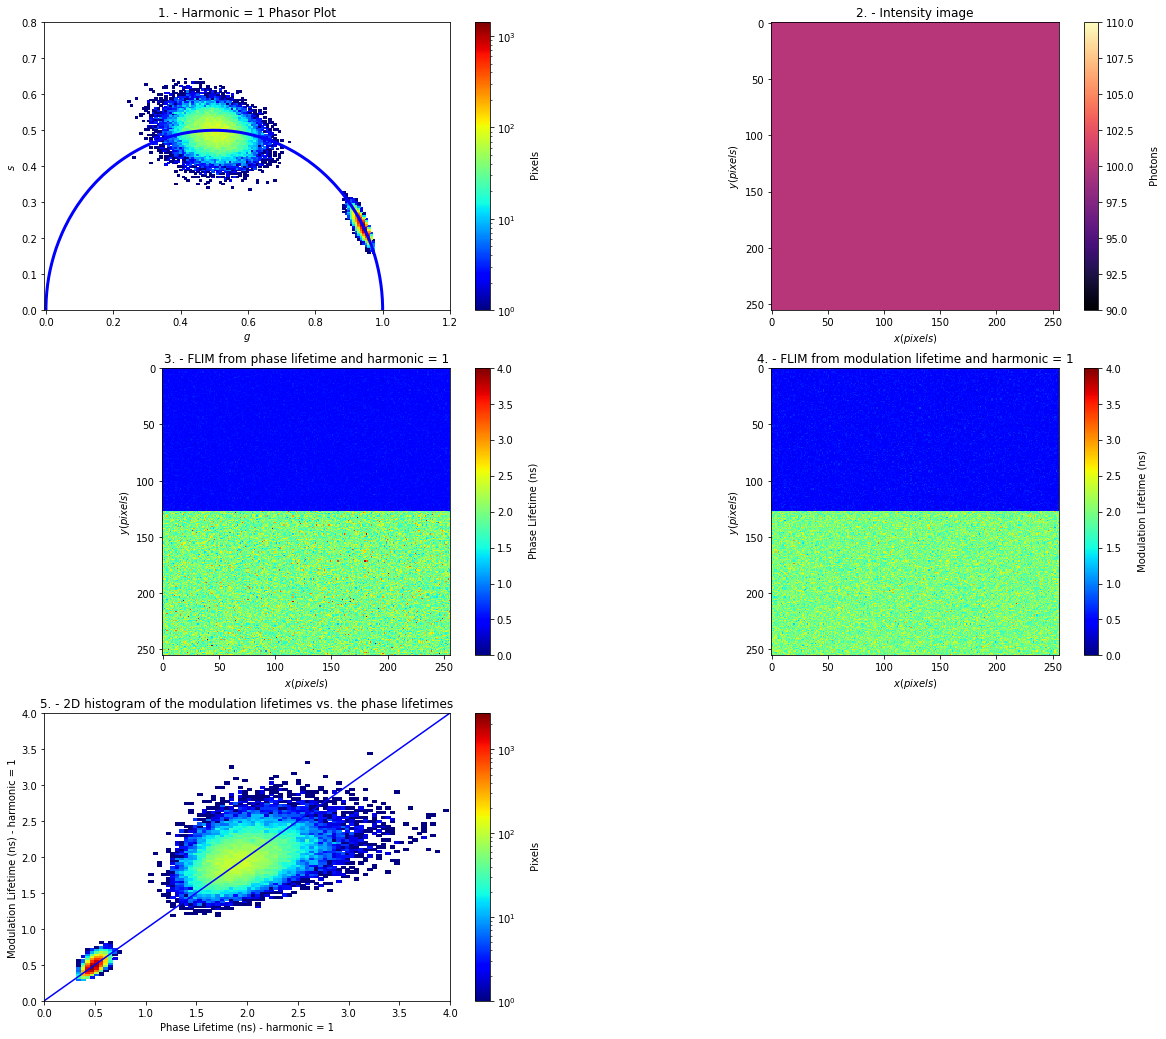

In [11]:
max_lifetime = tau4
tau_m,tau_p = phasor_plotting(G,S,image,max_lifetime)

# Median_filtering

The **median_filtering** function will ouput median filtered version of the FLIM images calculated both with phase and modulation respectively. x1 and x2 times median filter outputs are shown

In [21]:
def median_filtering(G,S,max_lifetime):

    G_result = ndimage.median_filter(G, size=3)
    S_result = ndimage.median_filter(S, size=3)

    G_result2 = ndimage.median_filter(G_result, size=3)
    S_result2 = ndimage.median_filter(S_result, size=3)

    fig = plt.figure(figsize=(23,18))

    h = 1
    tau_p = (laser_period_in_nanoseconds/(2*pi*h))*(S/G)
    plt.subplot(3,3,1),plt.imshow(tau_p, vmin = 0, vmax = max_lifetime, cmap='jet')
    title = "FLIM"
    plt.title(title)
    plt.xlabel('$x (pixels) $')
    plt.ylabel('$y (pixels) $')
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('Phase Lifetime (ns)')


    tau_p = (laser_period_in_nanoseconds/(2*pi*h))*(S_result/G_result)
    plt.subplot(3,3,2),plt.imshow(tau_p, vmin = 0, vmax = max_lifetime, cmap='jet')
    title = "FLIM - median filter x1 time"
    plt.title(title)
    plt.xlabel('$x (pixels) $')
    plt.ylabel('$y (pixels) $')
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('Phase Lifetime (ns)')


    tau_p = (laser_period_in_nanoseconds/(2*pi*h))*(S_result2/G_result2)
    plt.subplot(3,3,3),plt.imshow(tau_p, vmin = 0, vmax = max_lifetime, cmap='jet')
    title = "FLIM - median filter x2 times"
    plt.title(title)
    plt.xlabel('$x (pixels) $')
    plt.ylabel('$y (pixels) $')
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('Phase Lifetime (ns)')

    tau_m = (laser_period_in_nanoseconds/(2*pi*h))*np.sqrt((1/(S*S+G*G))-1)
    plt.subplot(3,3,4),plt.imshow(tau_m, vmin = 0, vmax = max_lifetime, cmap='jet')
    title = "FLIM"
    plt.title(title)
    plt.xlabel('$x (pixels) $')
    plt.ylabel('$y (pixels) $')
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('Modulation Lifetime (ns)')


    tau_m = (laser_period_in_nanoseconds/(2*pi*h))*np.sqrt((1/(S_result*S_result+G_result*G_result))-1)
    plt.subplot(3,3,5),plt.imshow(tau_m, vmin = 0, vmax = max_lifetime, cmap='jet')
    title = "FLIM - median filter x1 time"
    plt.title(title)
    plt.xlabel('$x (pixels) $')
    plt.ylabel('$y (pixels) $')
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('Modulation Lifetime (ns)')


    tau_m = (laser_period_in_nanoseconds/(2*pi*h))*np.sqrt((1/(S_result2*S_result2+G_result2*G_result2))-1)
    plt.subplot(3,3,6),plt.imshow(tau_m, vmin = 0, vmax = max_lifetime, cmap='jet')

    title = "FLIM - median filter x2 times"
    plt.title(title)
    plt.xlabel('$x (pixels) $')
    plt.ylabel('$y (pixels) $')
    cbar = plt.colorbar()
    l=cbar.ax.set_ylabel('Modulation Lifetime (ns)')
    
    
    # Phasor plot
    k= np.asarray(G).reshape(-1)
    v= np.asarray(S).reshape(-1)

    plt.subplot(3,3,7),plt.hist2d(k, v,bins = 100, cmap = 'jet', norm = colors.LogNorm()) 

    title = "Harmonic = "+str(harmonic)+" Phasor Plot"
    plt.title(title)
    plt.xlabel('$g$')
    plt.ylabel('$s$')

    cbar = plt.colorbar()
    cbar.ax.set_ylabel('\n Pixels')


    plt.xlim([-0.005,1.2])
    plt.ylim([0,0.8])
    x = np.linspace(-1.0, 1.0, 100)
    y = np.linspace(-1.0, 1.0, 100)
    X, Y = np.meshgrid(x,y)
    F = (X**2 + Y**2 - X)
    plt.contour(X,Y,F,[0],colors='b',linewidths=3)
    
    # Phasor plot x1 time median filter
    k= np.asarray(G_result).reshape(-1)
    v= np.asarray(S_result).reshape(-1)

    plt.subplot(3,3,8),plt.hist2d(k, v,bins = 100, cmap = 'jet', norm = colors.LogNorm()) 

    title = "Harmonic = "+str(harmonic)+" Phasor Plot median filter x1 time"
    plt.title(title)
    plt.xlabel('$g$')
    plt.ylabel('$s$')

    cbar = plt.colorbar()
    cbar.ax.set_ylabel('\n Pixels')


    plt.xlim([-0.005,1.2])
    plt.ylim([0,0.8])
    x = np.linspace(-1.0, 1.0, 100)
    y = np.linspace(-1.0, 1.0, 100)
    X, Y = np.meshgrid(x,y)
    F = (X**2 + Y**2 - X)
    plt.contour(X,Y,F,[0],colors='b',linewidths=3)
    
    # Phasor plot x2 times median filter
    k= np.asarray(G_result2).reshape(-1)
    v= np.asarray(S_result2).reshape(-1)

    plt.subplot(3,3,9),plt.hist2d(k, v,bins = 100, cmap = 'jet', norm = colors.LogNorm()) 

    title = "Harmonic = "+str(harmonic)+" Phasor Plot median filter x2 times"
    plt.title(title)
    plt.xlabel('$g$')
    plt.ylabel('$s$')

    cbar = plt.colorbar()
    cbar.ax.set_ylabel('\n Pixels')


    plt.xlim([-0.005,1.2])
    plt.ylim([0,0.8])
    x = np.linspace(-1.0, 1.0, 100)
    y = np.linspace(-1.0, 1.0, 100)
    X, Y = np.meshgrid(x,y)
    F = (X**2 + Y**2 - X)
    plt.contour(X,Y,F,[0],colors='b',linewidths=3)
    
    return

Calling **median_filtering**

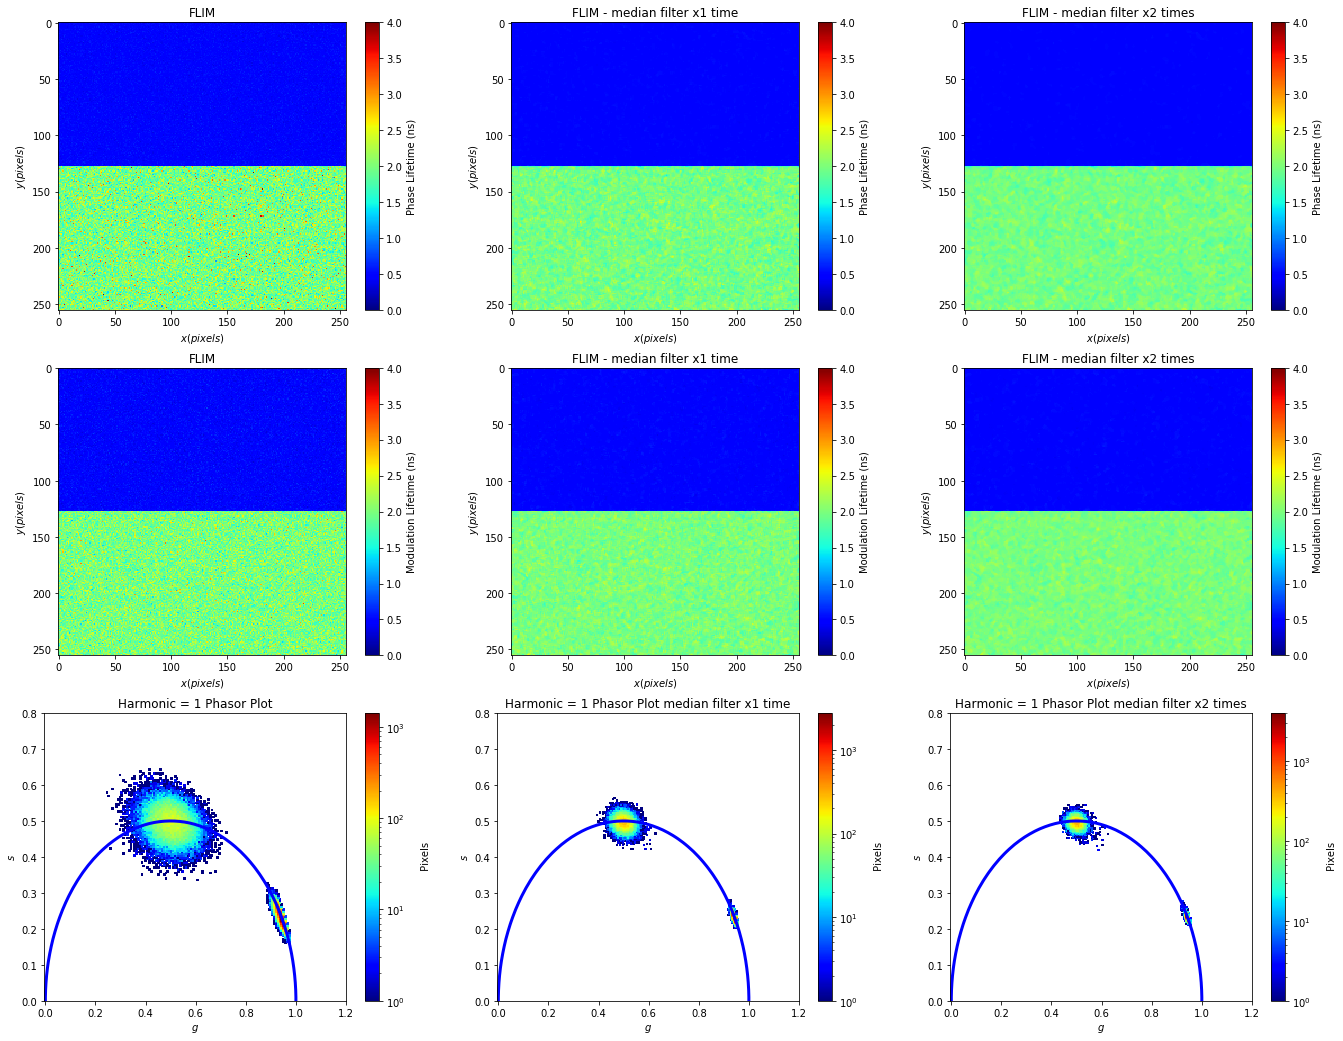

In [22]:
median_filtering(G,S,max_lifetime)

# Quarter_image

The **quarter_image** will produce an image made up my four subimages having equal intensities but different lifetimes.

**1st** subimage - tau1

**2nd** subimage - 50% tau1 and 50% tau2

**3rd** subimage - tau2

**4th** subimage - 50% tau1 and 50% tau3


**Inputs**
    
1. tau1 - lifetime in nanoseconds
2. tau2 - lifetime in nanoseconds
3. tau3 - lifetime in nanoseconds
4. photons - number of photons per pixel
5. laser_period_in_nanoseconds - laser period in nanoseconds
6. harmonic - harmonic number for the phasor plot analysis and representation
7. bin_number - number of time-bins in the TCSPC histogram
8. x_dim - x dimension in pixel of the final image
9. y_dim - y dimension in pixel of the final image
    
    
**Outputs**
    
1. image(x,y,photons) - x pixel, y pixel wide inensity image
2. G(x,y,g) - x pixel, y pixel wide g coordinates for the nth-harmonic phasor plot
3. S(x,y,s) - x pixel, y pixel wide s coordinates for the nth-harmonic phasor plot

In [23]:
def quarter_image(tau1, tau2, tau3, photons, laser_period_in_nanoseconds, harmonic, bin_number, x_dim, y_dim):
    
    # Inputs
    
    # tau1 - lifetime in nanoseconds
    # tau2 - lifetime in nanoseconds
    # tau3 - lifetime in nanoseconds
    # photons - number of photons per pixel
    # laser_period_in_nanoseconds - laser period in nanoseconds
    # harmonic - harmonic number for the phasor plot analysis and representation
    # bin_number - number of time-bins in the TCSPC histogram
    # x_dim - x dimension in pixel of the final image
    # y_dim - y dimension in pixel of the final image
    
    
    # Outputs
    
    # image(x,y,photons) - x pixel, y pixel wide inensity image
    # G(x,y,g) - x pixel, y pixel wide g coordinates for the nth-harmonic phasor plot
    # S(x,y,s) - x pixel, y pixel wide s coordinates for the nth-harmonic phasor plot
    
    
    
    # Allocating 2D datasets for the intensity image(x,y,photons), G(x,y,g) and  S(x,y,s)
    image = np.zeros((x_dim,y_dim)) # empty intensity image
    G = np.zeros((x_dim,y_dim))     # empty G matrix for phasors
    S = np.zeros((x_dim,y_dim))     # empty S matrix for phasors
    

    
    for i in range(0,int(x_dim/2)):
        for j in range(0,int(y_dim/2)):

            Y1 = np.random.exponential(tau1, int(photons)) # random exponential distribution having tau as a decay constant
            Y1 = (Y1)%laser_period_in_nanoseconds # using the MOD mathematical operation to constrain photons arrivals within the laser period
            dist1 = np.histogram(Y1, bins=bin_number) # TCSPC histogram calculation
            x1 = dist1[1][0:-1] # x axis values for TCSPC histogram
            y1 = dist1[0]       # y axis values for TCSPC histogram
            sine1 = np.sin(2*pi*harmonic*x1/laser_period_in_nanoseconds) # creating sine wave for phasor approach
            cosine1 = np.cos(2*pi*harmonic*x1/laser_period_in_nanoseconds) # creating cosine wave for phasor approach
            G[i][j] = (cosine1*y1).sum()/y1.sum() # computing G matrix
            S[i][j] = (sine1*y1).sum()/y1.sum()   # computing S matrix
            image[i][j] = y1.sum()                # computing intensity image

    for i in range(0,int(x_dim/2)):
        for j in range(int(y_dim/2),y_dim):

            Y1 = np.random.exponential(tau1, int(photons/2)) # random exponential distribution having tau as a decay constant
            Y1 = (Y1)%laser_period_in_nanoseconds # using the MOD mathematical operation to constrain photons arrivals within the laser period
            Y2 = np.random.exponential(tau2, int(photons/2)) # random exponential distribution having tau as a decay constant
            Y2 = (Y2)%laser_period_in_nanoseconds # using the MOD mathematical operation to constrain photons arrivals within the laser period
            Y = numpy.concatenate((Y1, Y2)) # concatenating Y1 and Y2 distribution to get a double lifetine specie fluorescence decay
            # the two species are mixed as their ratio is 1:1
            dist1 = np.histogram(Y, bins=bin_number)
            x1 = dist1[1][0:-1] # x axis values for TCSPC histogram
            y1 = dist1[0]       # y axis values for TCSPC histogram
            sine1 = np.sin(2*pi*harmonic*x1/laser_period_in_nanoseconds) # creating sine wave for phasor approach
            cosine1 = np.cos(2*pi*harmonic*x1/laser_period_in_nanoseconds) # creating cosine wave for phasor approach
            G[i][j] = (cosine1*y1).sum()/y1.sum() # computing G matrix
            S[i][j] = (sine1*y1).sum()/y1.sum()   # computing S matrix
            image[i][j] = y1.sum()                # computing intensity image

    for i in range(int(x_dim/2),x_dim):
        for j in range(int(y_dim/2),y_dim):

            Y1 = np.random.exponential(tau2, int(photons)) # random exponential distribution having tau as a decay constant
            Y1 = (Y1)%laser_period_in_nanoseconds # using the MOD mathematical operation to constrain photons arrivals within the laser period
            dist1 = np.histogram(Y1, bins=bin_number) # TCSPC histogram calculation
            x1 = dist1[1][0:-1] # x axis values for TCSPC histogram
            y1 = dist1[0]       # y axis values for TCSPC histogram
            sine1 = np.sin(2*pi*harmonic*x1/laser_period_in_nanoseconds) # creating sine wave for phasor approach
            cosine1 = np.cos(2*pi*harmonic*x1/laser_period_in_nanoseconds) # creating cosine wave for phasor approach
            G[i][j] = (cosine1*y1).sum()/y1.sum() # computing G matrix
            S[i][j] = (sine1*y1).sum()/y1.sum()   # computing S matrix
            image[i][j] = y1.sum()                # computing intensity image

    for i in range(int(x_dim/2),x_dim):
        for j in range(0,int(y_dim/2)):

            Y1 = np.random.exponential(tau1, int(photons/2)) # random exponential distribution having tau as a decay constant
            Y1 = (Y1)%laser_period_in_nanoseconds # using the MOD mathematical operation to constrain photons arrivals within the laser period
            Y2 = np.random.exponential(tau3, int(photons/2)) # random exponential distribution having tau as a decay constant
            Y2 = (Y2)%laser_period_in_nanoseconds # using the MOD mathematical operation to constrain photons arrivals within the laser period
            Y = numpy.concatenate((Y1, Y2)) # concatenating Y1 and Y2 distribution to get a double lifetine specie fluorescence decay
            # the two species are mixed as their ratio is 1:1
            dist1 = np.histogram(Y, bins=bin_number)
            x1 = dist1[1][0:-1] # x axis values for TCSPC histogram
            y1 = dist1[0]       # y axis values for TCSPC histogram
            sine1 = np.sin(2*pi*harmonic*x1/laser_period_in_nanoseconds) # creating sine wave for phasor approach
            cosine1 = np.cos(2*pi*harmonic*x1/laser_period_in_nanoseconds) # creating cosine wave for phasor approach
            G[i][j] = (cosine1*y1).sum()/y1.sum() # computing G matrix
            S[i][j] = (sine1*y1).sum()/y1.sum()   # computing S matrix
            image[i][j] = y1.sum()                # computing intensity image

    return G,S,image

Calling **quarter_image**

In [24]:
G,S,image=quarter_image(tau1, tau2, tau3, photons, laser_period_in_nanoseconds, harmonic, bin_number, x_dim, y_dim)

Calling **phasor_plotting** and **median_filtering**

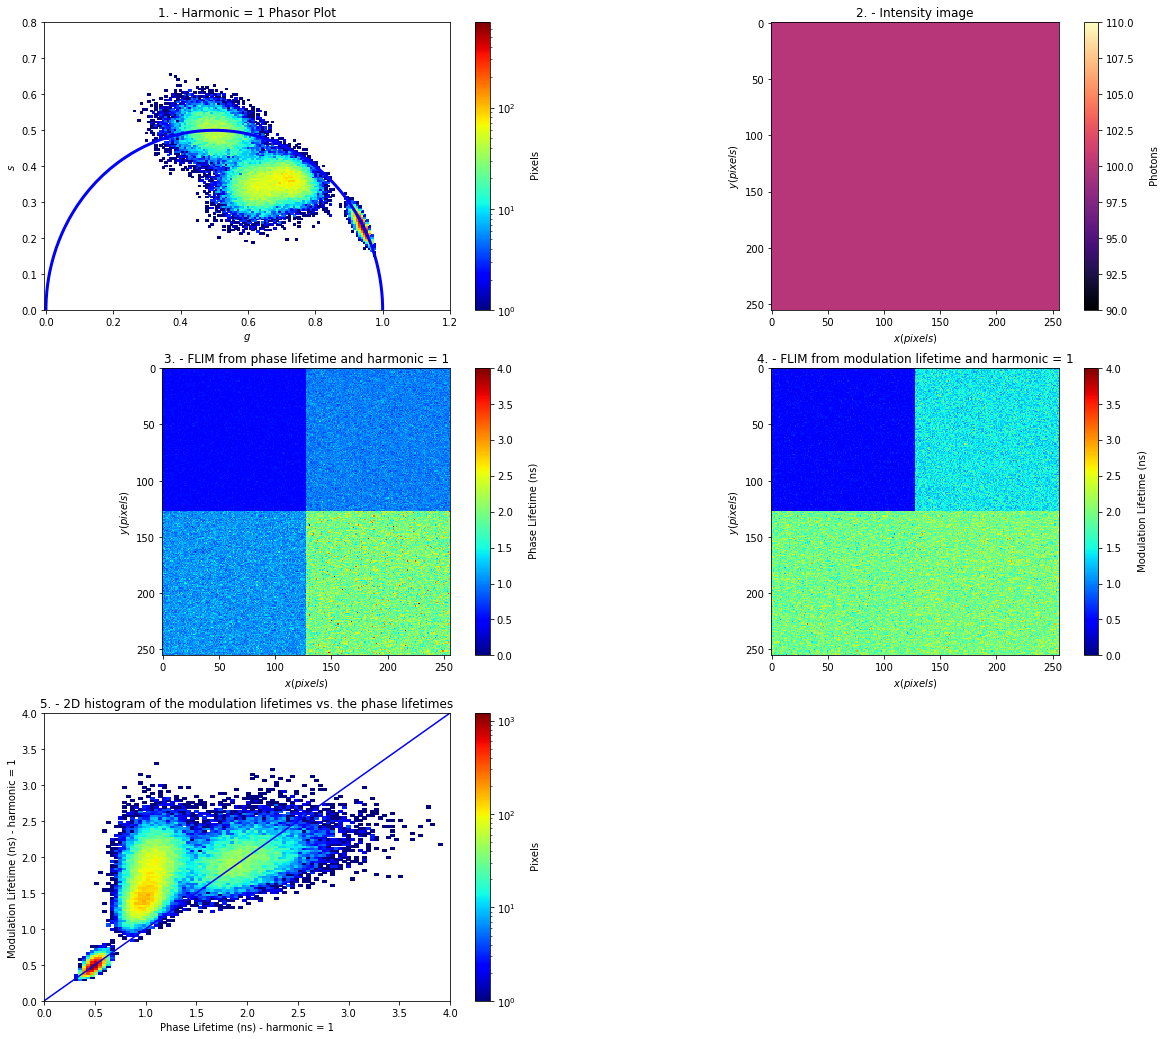

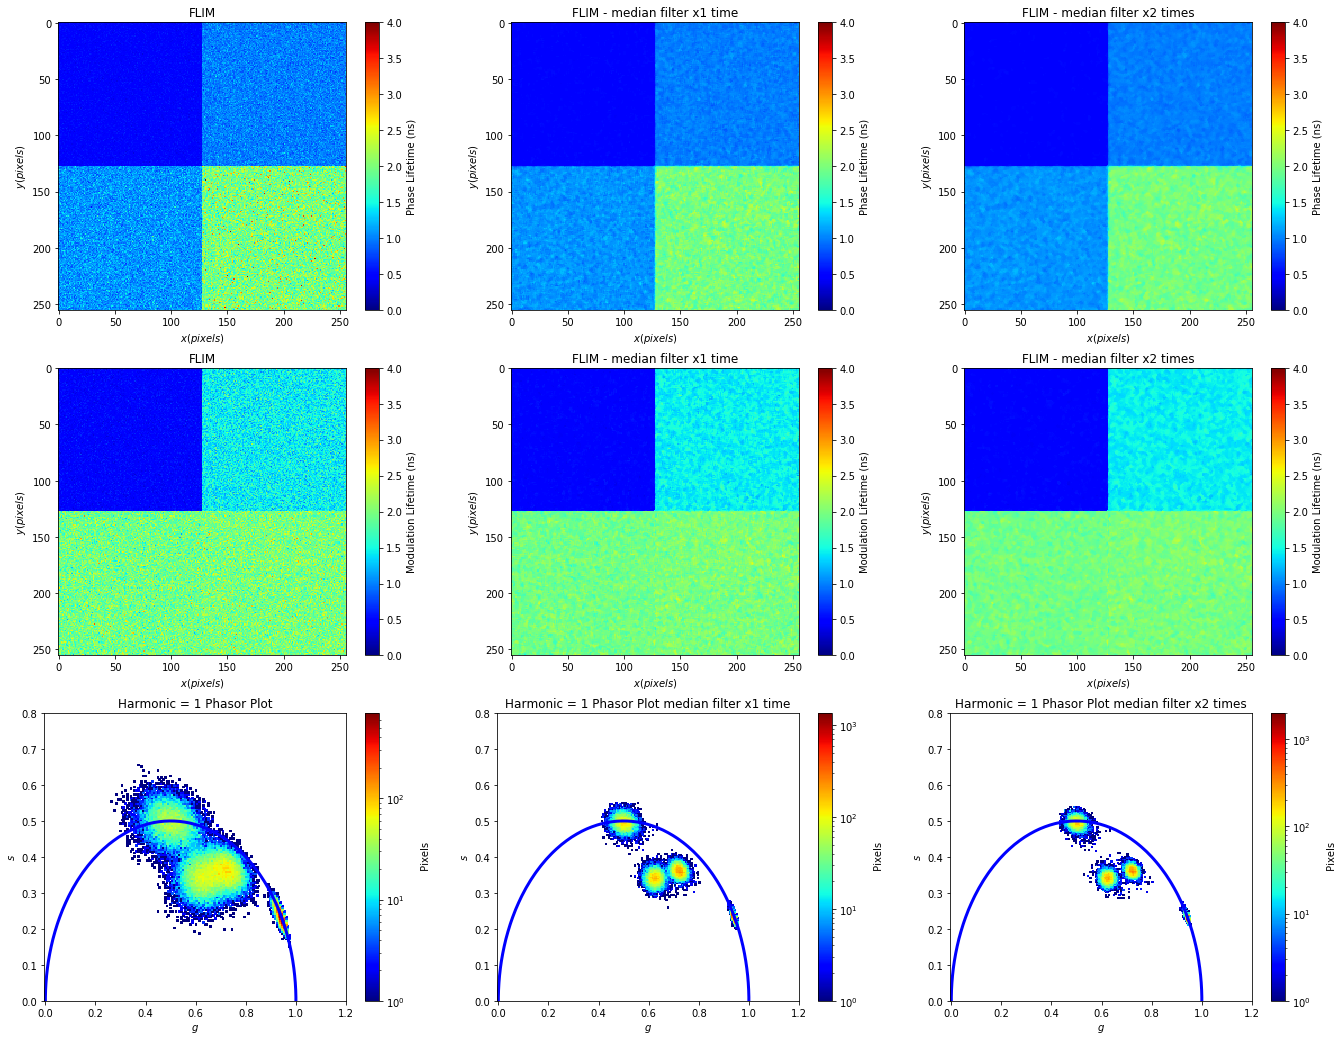

In [25]:
tau_m,tau_p = phasor_plotting(G,S,image,max_lifetime)
median_filtering(G,S,max_lifetime)

# Example

In [26]:
tau1 = 1
tau2 = 2.5
tau3 = 4.3

photons = 120
laser_period_in_nanoseconds = 12.5
harmonic = 1
x_dim = 512
y_dim = x_dim
max_lifetime = tau3 + 1

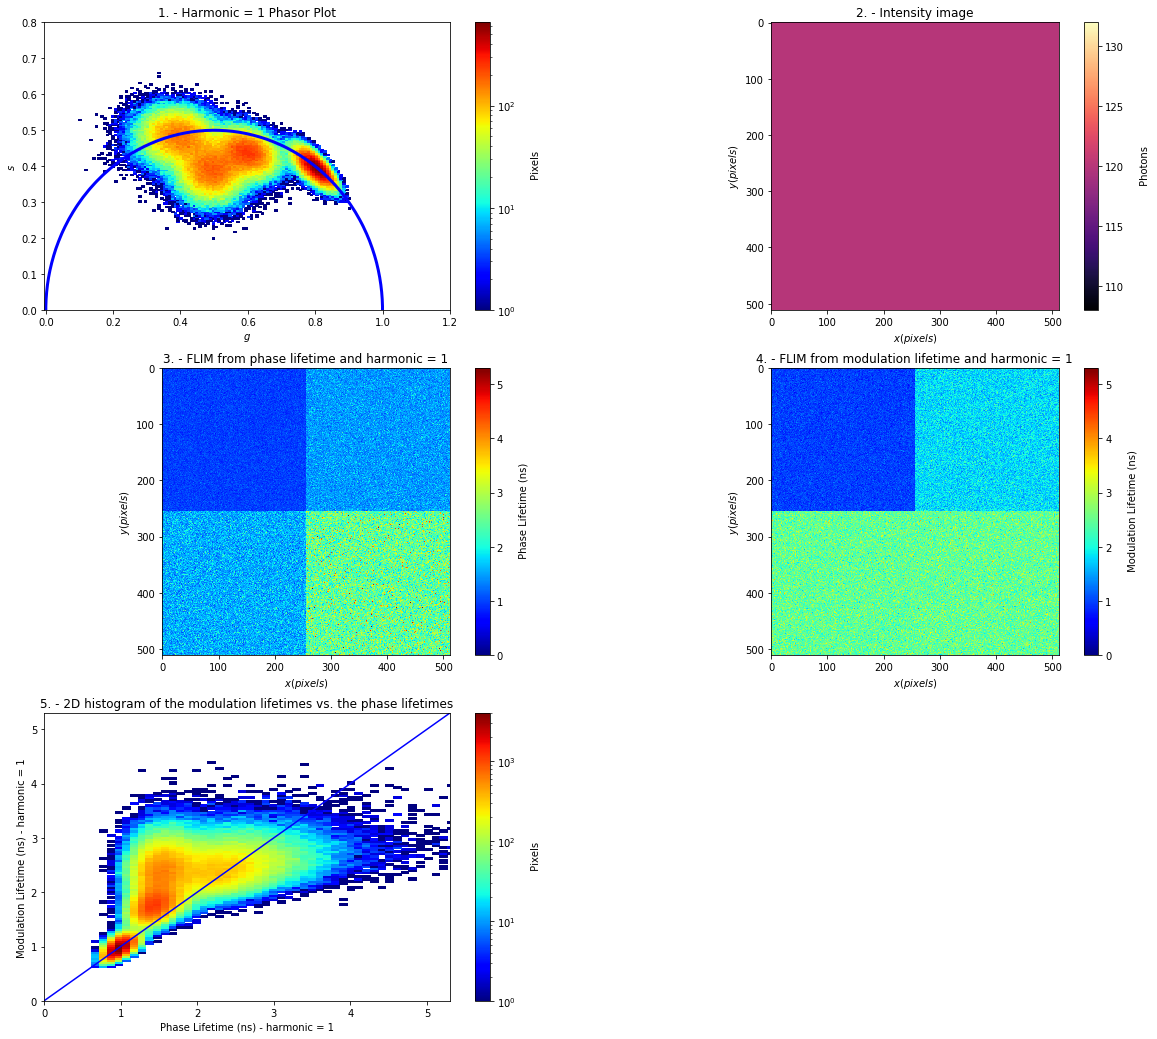

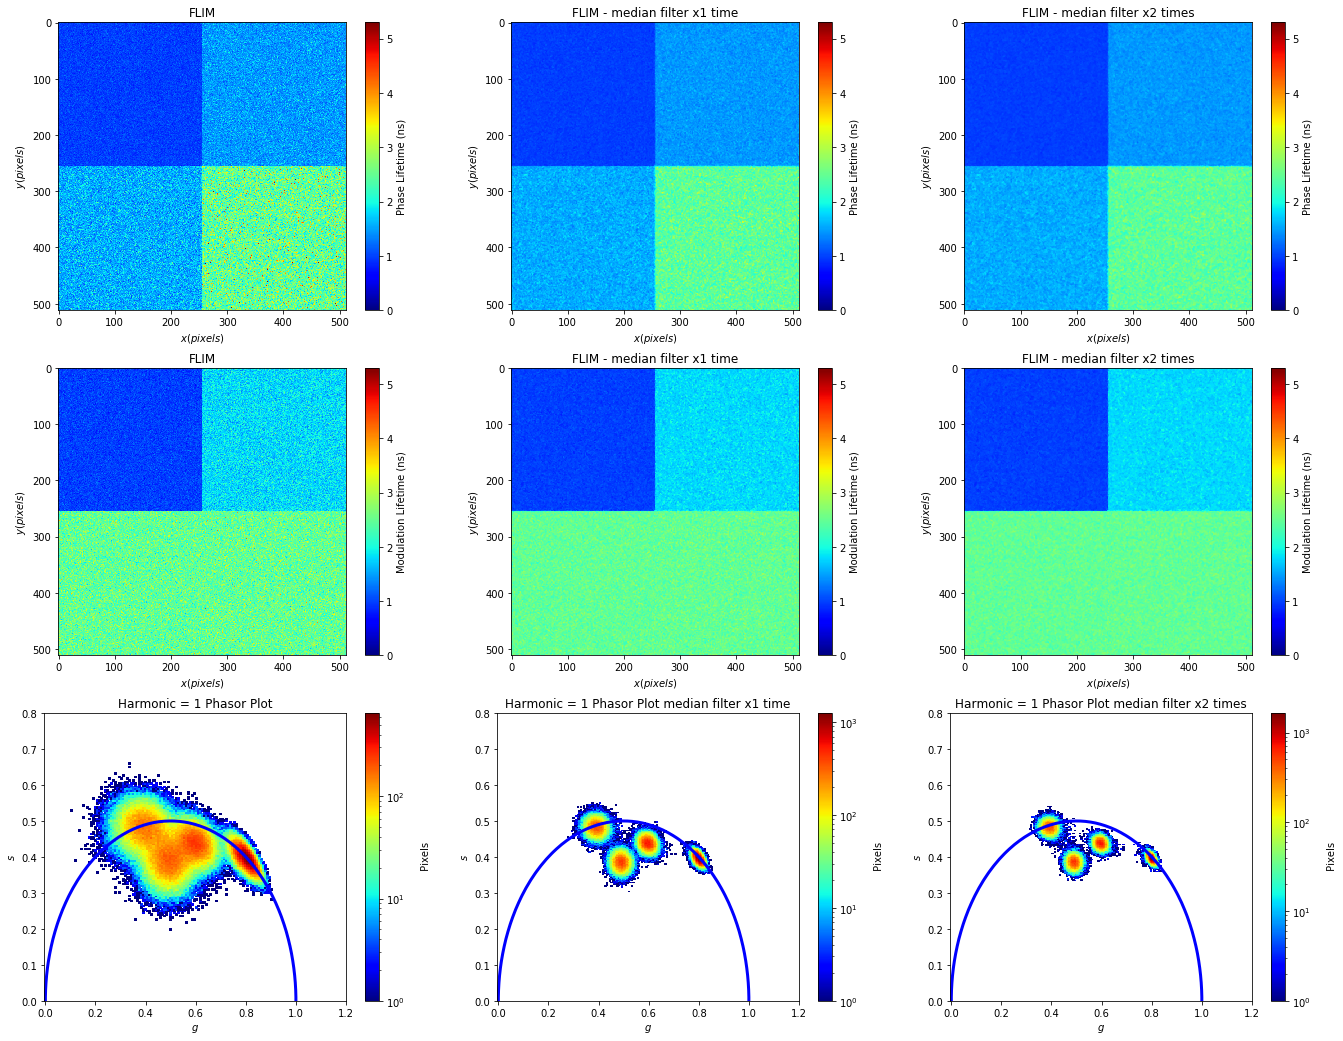

In [27]:
G,S,image=quarter_image(tau1, tau2, tau3, photons, laser_period_in_nanoseconds, harmonic, bin_number, x_dim, y_dim)
tau_m,tau_p = phasor_plotting(G,S,image,max_lifetime)
median_filtering(G,S,max_lifetime)